In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

In [5]:
# Data Loading
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], dayfirst=True)
df.set_index('date', inplace=True)
exchange_rate = df['Ex_rate']

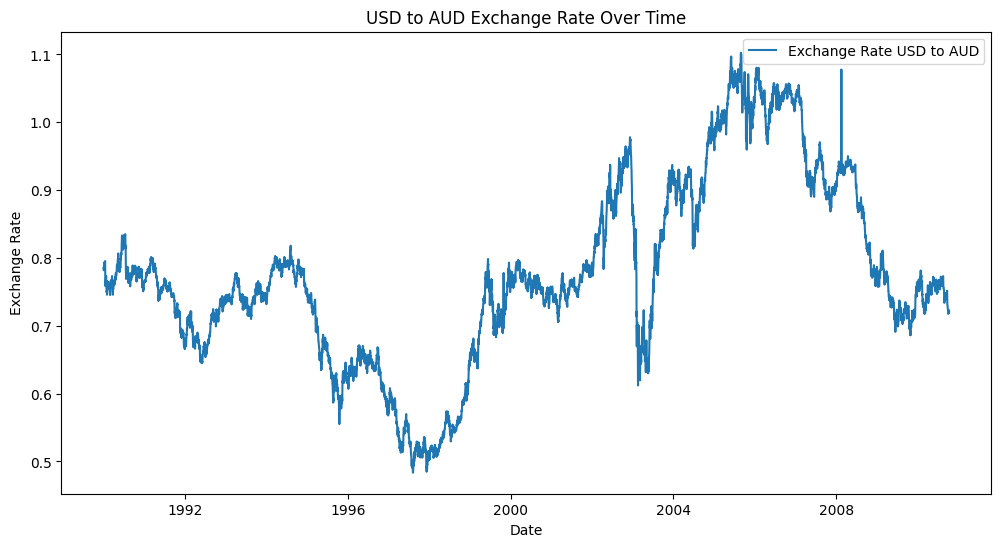

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate, label="Exchange Rate USD to AUD")
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [7]:
# Forward fill any missing values
exchange_rate = exchange_rate.fillna(method='ffill')

C:\Users\dell\AppData\Local\Temp\ipykernel_1396\2962731439.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exchange_rate = exchange_rate.fillna(method='ffill')


<Figure size 1200x600 with 0 Axes>

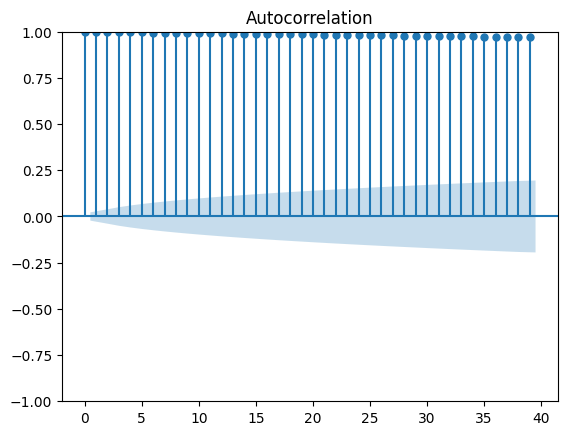

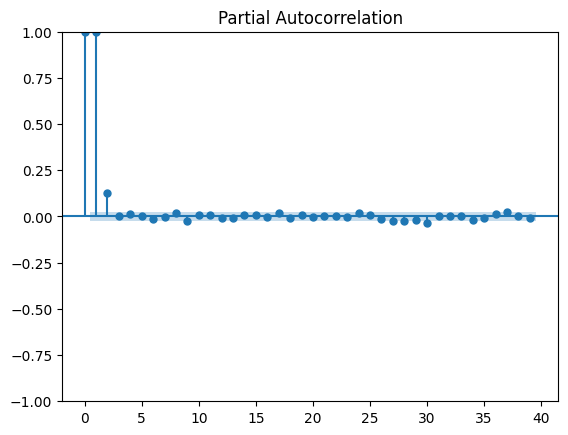

In [8]:
plt.figure(figsize=(12, 6))
plot_acf(exchange_rate)
plot_pacf(exchange_rate)
plt.show()

In [9]:
# Set p, d, q based on ACF and PACF plots (example values used here)
p, d, q = 1, 1, 1  
arima_model = ARIMA(exchange_rate, order=(p, d, q))
arima_fit = arima_model.fit()

C:\Users\dell\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


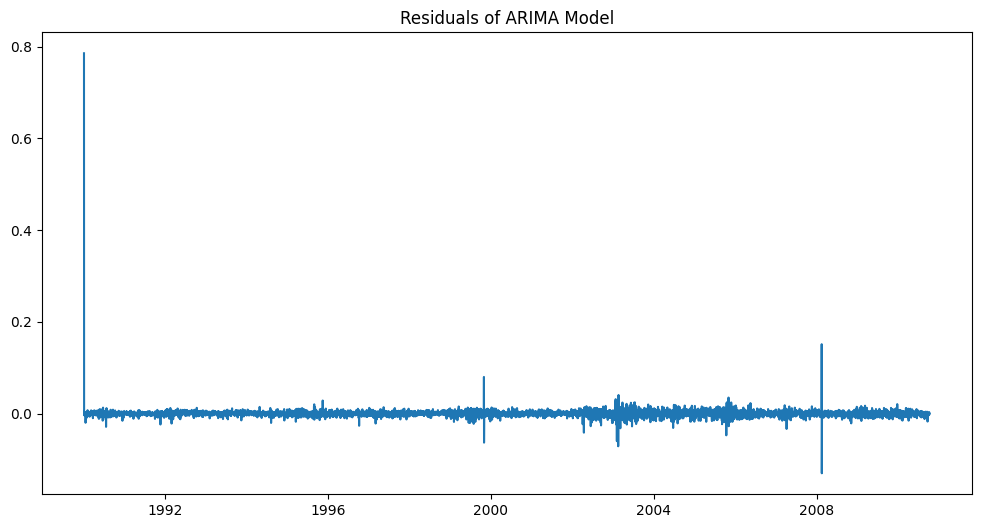

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(arima_fit.resid)
plt.title("Residuals of ARIMA Model")
plt.show()

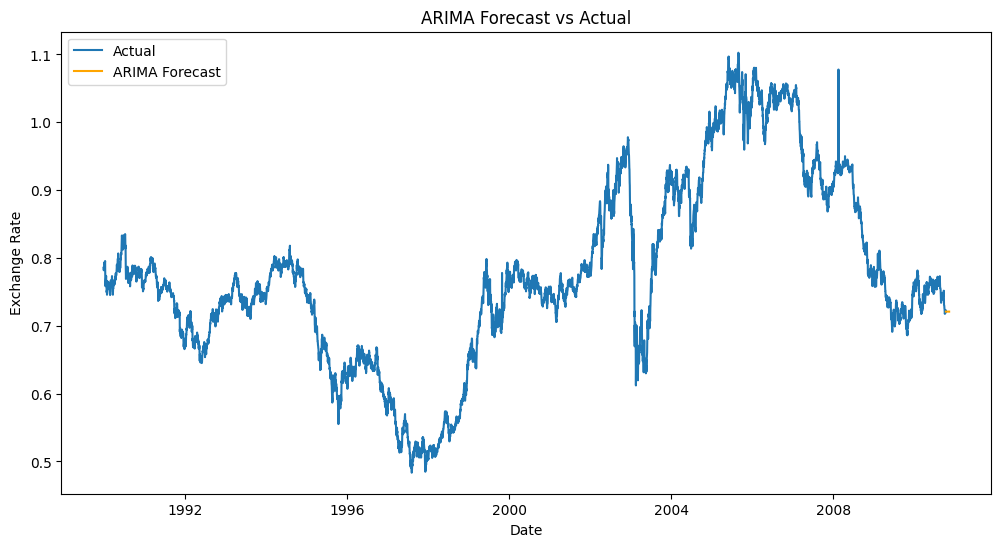

In [13]:
arima_forecast = arima_fit.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate, label="Actual")
plt.plot(arima_forecast, label="ARIMA Forecast", color='orange')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [20]:
exp_smooth_model = ExponentialSmoothing(exchange_rate, trend='add', seasonal=None)
exp_smooth_fit = exp_smooth_model.fit()

C:\Users\dell\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


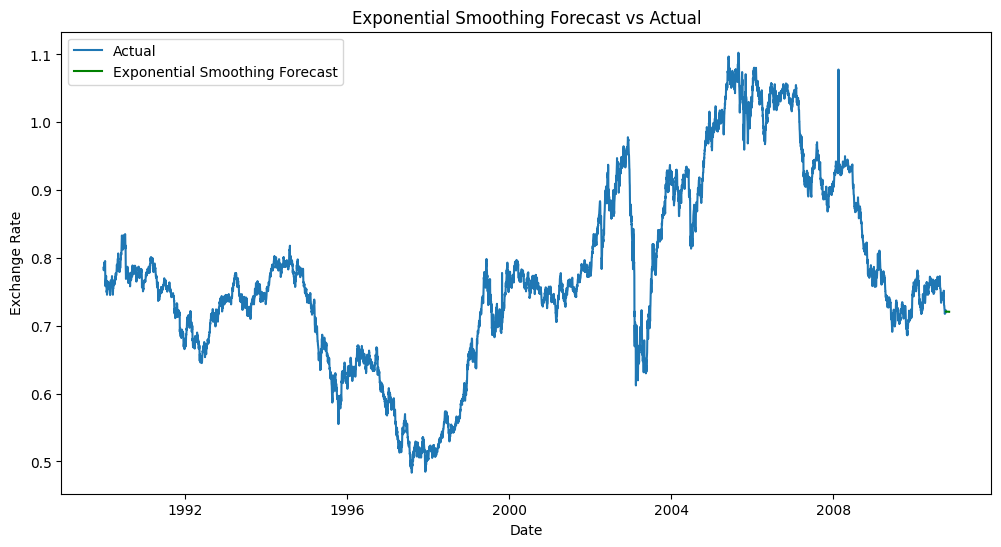

In [22]:
exp_smooth_forecast = exp_smooth_fit.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate, label="Actual")
plt.plot(exp_smooth_forecast, label="Exponential Smoothing Forecast", color='green')
plt.title("Exponential Smoothing Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [24]:
arima_mae = mean_absolute_error(exchange_rate[-30:], arima_forecast)
arima_rmse = sqrt(mean_squared_error(exchange_rate[-30:], arima_forecast))
arima_mape = mean_absolute_percentage_error(exchange_rate[-30:], arima_forecast)

exp_mae = mean_absolute_error(exchange_rate[-30:], exp_smooth_forecast)
exp_rmse = sqrt(mean_squared_error(exchange_rate[-30:], exp_smooth_forecast))
exp_mape = mean_absolute_percentage_error(exchange_rate[-30:], exp_smooth_forecast)

print("ARIMA - MAE:", arima_mae, "RMSE:", arima_rmse, "MAPE:", arima_mape)
print("Exponential Smoothing - MAE:", exp_mae, "RMSE:", exp_rmse, "MAPE:", exp_mape)

ARIMA - MAE: 0.012724006489318252 RMSE: 0.016982710912774826 MAPE: 0.017119209757097405
Exponential Smoothing - MAE: 0.012755756156713368 RMSE: 0.017005229952751045 MAPE: 0.017162296104211213


In [26]:
if arima_mape < exp_mape:
    print("ARIMA model performed better.")
else:
    print("Exponential Smoothing model performed better.")

ARIMA model performed better.
